Quais são os principais bens materiais comprados pelos órgãos públicos do Rio Grande do Sul?
É possível identificar algum padrão nas compras? Seja por época do ano ou por tipo de órgão
comprador? O que mais é possível descobrir sobre as licitações do estado?

In [2]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [3]:
licitacao_2016 = pd.read_csv(r'C:\Users\estev\OneDrive\Área de Trabalho\DSB\2016\licitacao.csv', low_memory=False)
item_2016 =  pd.read_csv(r'C:\Users\estev\OneDrive\Área de Trabalho\DSB\2016\item.csv', low_memory=False)
licitacao_2017 = pd.read_csv(r'C:\Users\estev\OneDrive\Área de Trabalho\DSB\2017\licitacao.csv', low_memory=False)
item_2017 =  pd.read_csv(r'C:\Users\estev\OneDrive\Área de Trabalho\DSB\2017\item.csv', low_memory=False)
licitacao_2018 = pd.read_csv(r'C:\Users\estev\OneDrive\Área de Trabalho\DSB\2018\licitacao.csv', low_memory=False)
item_2018 =  pd.read_csv(r'C:\Users\estev\OneDrive\Área de Trabalho\DSB\2018\item.csv', low_memory=False)
licitacao_2019 = pd.read_csv(r'C:\Users\estev\OneDrive\Área de Trabalho\DSB\2019\licitacao.csv', low_memory=False)
item_2019 =  pd.read_csv(r'C:\Users\estev\OneDrive\Área de Trabalho\DSB\2019\item.csv', low_memory=False)

In [6]:
item_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884560 entries, 0 to 884559
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   CD_ORGAO                        884560 non-null  int64  
 1   NR_LICITACAO                    884560 non-null  float64
 2   ANO_LICITACAO                   884560 non-null  int64  
 3   CD_TIPO_MODALIDADE              884560 non-null  object 
 4   NR_LOTE                         884560 non-null  int64  
 5   NR_ITEM                         884560 non-null  int64  
 6   NR_ITEM_ORIGINAL                884560 non-null  object 
 7   DS_ITEM                         884560 non-null  object 
 8   QT_ITENS                        884560 non-null  object 
 9   SG_UNIDADE_MEDIDA               884560 non-null  object 
 10  VL_UNITARIO_ESTIMADO            853300 non-null  float64
 11  VL_TOTAL_ESTIMADO               853300 non-null  float64
 12  DT_REF_VALOR_EST

In [7]:
item_2019['CD_TIPO_FAMILIA'].value_counts() 

792.0    2428
880.0    2340
8.0      1755
784.0    1709
600.0    1512
         ... 
748.0       2
593.0       1
70.0        1
750.0       1
64.0        1
Name: CD_TIPO_FAMILIA, Length: 122, dtype: int64

CD_TIPO_FAMILIA é primeiro nível de classificação/detalhamento do objeto licitado, por código disponível em https://portalnovo.tce.rs.gov.br/sistemas-de-controle-externo/?section=LICITACON
documento B: planilha 6.1 Família

In [8]:
licitacao_2019.head()

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_COMISSAO,ANO_COMISSAO,TP_COMISSAO,NR_PROCESSO,ANO_PROCESSO,...,TP_DOCUMENTO_FORNECEDOR,NR_DOCUMENTO_FORNECEDOR,TP_DOCUMENTO_VENCEDOR,NR_DOCUMENTO_VENCEDOR,VL_HOMOLOGADO,BL_GERA_DESPESA,DS_OBSERVACAO,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA,BL_COMPARTILHADA
0,53100,PM DE NOVA PALMA,3.0,2019,TMP,6679.0,2018.0,P,101,2019.0,...,NaN,NaN,J,09616071000198,272269.69,S,NaN,NaN,NaN,N
1,53100,PM DE NOVA PALMA,1.0,2019,TMP,6679.0,2018.0,P,035,2019.0,...,NaN,NaN,J,09616071000198,75363.72,S,NaN,NaN,NaN,N
2,51802,CIA. ÁGUAS TERMAIS MARCELINO RAMOS - TERMASA,3.0,2019,EST,1.0,2018.0,P,3,2019.0,...,NaN,NaN,J,23178651000171,126240.00,N,NaN,NaN,NaN,N
3,84100,PM DE ESPERANÇA DO SUL,34.0,2019,CNV,326.0,2017.0,P,415,2019.0,...,NaN,NaN,J,90167065000119,9600.00,S,NaN,NaN,NaN,N
4,86800,PM DE BOA VISTA DO SUL,3.0,2019,PRP,4.0,2019.0,G,004,2019.0,...,NaN,NaN,J,02934207000169,430770.00,S,NaN,NaN,NaN,N


In [9]:
licitacao_2019['DS_OBJETO'].describe()

count                                                 70546
unique                                                66516
top       Credenciamento de pessoa física ou jurídica, p...
freq                                                     67
Name: DS_OBJETO, dtype: object

In [10]:
licitacao_2019['NR_LICITACAO'].value_counts()

1.00        3836
2.00        2980
3.00        2472
4.00        2184
5.00        1988
            ... 
3846.00        1
3868.00        1
984.00         1
3546.00        1
84509.55       1
Name: NR_LICITACAO, Length: 2917, dtype: int64

In [11]:
licitacao_2019['TP_OBJETO'].describe()

count     70546
unique        8
top         OUS
freq      23902
Name: TP_OBJETO, dtype: object

In [12]:
licitacao_2019['TP_OBJETO'].value_counts() #COM é o fator que se refere a compras

OUS    23902
COM    22330
CSE    17818
OSE     4598
LOC      828
ALB      487
CON      324
PER      259
Name: TP_OBJETO, dtype: int64

In [13]:
licitacao_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70546 entries, 0 to 70545
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CD_ORGAO                     70546 non-null  int64  
 1   NM_ORGAO                     70546 non-null  object 
 2   NR_LICITACAO                 70546 non-null  float64
 3   ANO_LICITACAO                70546 non-null  int64  
 4   CD_TIPO_MODALIDADE           70546 non-null  object 
 5   NR_COMISSAO                  42584 non-null  float64
 6   ANO_COMISSAO                 42584 non-null  float64
 7   TP_COMISSAO                  42584 non-null  object 
 8   NR_PROCESSO                  70462 non-null  object 
 9   ANO_PROCESSO                 70463 non-null  float64
 10  TP_OBJETO                    70546 non-null  object 
 11  CD_TIPO_FASE_ATUAL           70546 non-null  object 
 12  TP_LICITACAO                 70546 non-null  object 
 13  TP_NIVEL_JULGAME

In [14]:
licitacao_2019['DT_ABERTURA'].value_counts() #data da abertura da licitação

2019-01-02    701
2019-03-01    446
2019-02-28    433
2019-04-30    407
2019-03-28    405
             ... 
2016-01-28      1
2018-11-30      1
2020-01-31      1
2017-11-10      1
2018-10-11      1
Name: DT_ABERTURA, Length: 434, dtype: int64

In [15]:
item_2019['DS_ITEM'].describe() #não é uma boa variável para basear uma análise
# mais exploratória do dados, alta cardinalidade


count     884560
unique    665844
top        LIVRO
freq         760
Name: DS_ITEM, dtype: object

Foi informado erroneamente no exercício de que existe uma coluna ID_LICITACAO no arquivo de licitações. Observei também que NR_LICITAÇÕES não se trata de uma chave única e a mesma é repetida inúmeras vezes, inclusive o mesmo número indetificador de licitação em órgãos diferentes (basta olhar o output de licitacao_2019.head()). De acordo com o manual, para o documento licitacoes: "Não podem ser informados, para um mesmo arquivo de leiaute, dois ou mais registros com a mesma combinação de valores dos campos formadores da chave do registro. A chave deste registro é: NR_LICITACAO, ANO_LICITACAO e CD_TIPO_MODALIDADE." 

Desta forma, a priori, a combinação única destas 3 colunas + CD_ORGAO seriam a chave/combinação única para cada entrada/observação nestes documentos. 


In [16]:
lic_item2019 = pd.merge(licitacao_2019, item_2019, on=['CD_ORGAO','CD_TIPO_MODALIDADE', 'NR_LICITACAO'])
lic_item2019.shape

(884564, 90)

In [17]:
lic_item2019.head()

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO_x,CD_TIPO_MODALIDADE,NR_COMISSAO,ANO_COMISSAO,TP_COMISSAO,NR_PROCESSO,ANO_PROCESSO,...,TP_ORCAMENTO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_BENEFICIO_MICRO_EPP_y,PC_TX_ESTIMADA_y,PC_TX_HOMOLOGADA_y
0,53100,PM DE NOVA PALMA,3.0,2019,TMP,6679.0,2018.0,P,101,2019.0,...,NaN,NaN,NaN,J,09616071000198,NaN,NaN,NaN,NaN,NaN
1,53100,PM DE NOVA PALMA,1.0,2019,TMP,6679.0,2018.0,P,035,2019.0,...,NaN,NaN,NaN,J,09616071000198,NaN,NaN,NaN,NaN,NaN
2,53100,PM DE NOVA PALMA,1.0,2019,TMP,6679.0,2018.0,P,035,2019.0,...,NaN,NaN,NaN,J,09616071000198,NaN,NaN,NaN,NaN,NaN
3,53100,PM DE NOVA PALMA,1.0,2019,TMP,6679.0,2018.0,P,035,2019.0,...,NaN,NaN,NaN,J,09616071000198,NaN,NaN,NaN,NaN,NaN
4,53100,PM DE NOVA PALMA,1.0,2019,TMP,6679.0,2018.0,P,035,2019.0,...,NaN,NaN,NaN,J,09616071000198,NaN,NaN,NaN,NaN,NaN


In [18]:
lic_item2019_COM = lic_item2019.loc[(lic_item2019.TP_OBJETO == 'COM') & (lic_item2019.CD_TIPO_FAMILIA.notnull())] 
lic_item2019_COM.shape #dados com apenas objeto de licitação do tipo compras e onde a família dos items não é nula

(22867, 90)

In [20]:
lic_item2018 = pd.merge(licitacao_2018, item_2018, on=['CD_ORGAO','CD_TIPO_MODALIDADE', 'NR_LICITACAO'])
lic_item2018.shape

(957134, 90)

In [21]:
lic_item2018_COM = lic_item2018.loc[(lic_item2018.TP_OBJETO == 'COM') & (lic_item2018.CD_TIPO_FAMILIA.notnull())] 
lic_item2018_COM.shape #dados com apenas objeto de licitação do tipo compras e onde a família dos items não é nula

(30113, 90)

In [22]:
lic_item2017 = pd.merge(licitacao_2017, item_2017, on=['CD_ORGAO','CD_TIPO_MODALIDADE', 'NR_LICITACAO'])
lic_item2017.shape

(902710, 90)

In [23]:
lic_item2017_COM = lic_item2017.loc[(lic_item2017.TP_OBJETO == 'COM') & (lic_item2017.CD_TIPO_FAMILIA.notnull())] 
lic_item2017_COM.shape #dados com apenas objeto de licitação do tipo compras e onde a família dos items não é nula

(41736, 90)

In [24]:
lic_item2016 = pd.merge(licitacao_2016, item_2016, on=['CD_ORGAO','CD_TIPO_MODALIDADE', 'NR_LICITACAO'])
lic_item2016.shape

(456368, 90)

In [25]:
lic_item2016_COM = lic_item2016.loc[(lic_item2016.TP_OBJETO == 'COM') & (lic_item2016.CD_TIPO_FAMILIA.notnull())] 
lic_item2016_COM.shape #dados com apenas objeto de licitação do tipo compras e onde a família dos items não é nula

(35330, 90)

In [26]:
dataset_final = pd.concat([lic_item2019_COM, lic_item2018_COM, lic_item2017_COM, lic_item2016_COM])
dataset_final #dataset final

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO_x,CD_TIPO_MODALIDADE,NR_COMISSAO,ANO_COMISSAO,TP_COMISSAO,NR_PROCESSO,ANO_PROCESSO,...,TP_ORCAMENTO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_BENEFICIO_MICRO_EPP_y,PC_TX_ESTIMADA_y,PC_TX_HOMOLOGADA_y
482,74000,PM DE BARRA FUNDA,17.0,2019,PRP,3211.0,2019.0,G,087,2019.0,...,NaN,965.0,1.0,J,97320451003910,NaN,NaN,NaN,NaN,NaN
1428,77900,PM DE NICOLAU VERGUEIRO,8.0,2019,CNV,1.0,2019.0,P,008,2019.0,...,NaN,757.0,266.0,J,02506360000276,NaN,NaN,NaN,NaN,NaN
1500,42600,PM DE BRAGA,24.0,2019,PRP,4.0,2019.0,G,48,2019.0,...,NaN,736.0,642.0,J,06086872000109,NaN,NaN,NaN,NaN,NaN
1501,42600,PM DE BRAGA,35.0,2019,PRP,4.0,2019.0,G,66,2019.0,...,NaN,460.0,779.0,J,11082721000104,NaN,NaN,NaN,NaN,NaN
1847,40100,PM DE AGUDO,11.0,2019,PRP,92019.0,2019.0,G,728,2019.0,...,NaN,965.0,1.0,J,11800003000126,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456275,41603,"DEPARTAMENTO DE ÁGUA, ARROIOS E ESGOTO DE BAGÉ",18.0,2016,PRE,4.0,2016.0,G,18,2016.0,...,NaN,33.0,NaN,J,2459406000162.0,NaN,NaN,L,NaN,NaN
456276,41603,"DEPARTAMENTO DE ÁGUA, ARROIOS E ESGOTO DE BAGÉ",18.0,2016,PRE,4.0,2016.0,G,18,2016.0,...,NaN,33.0,NaN,J,2459406000162.0,NaN,NaN,L,NaN,NaN
456277,41603,"DEPARTAMENTO DE ÁGUA, ARROIOS E ESGOTO DE BAGÉ",18.0,2016,PRE,4.0,2016.0,G,18,2016.0,...,NaN,33.0,NaN,J,2459406000162.0,NaN,NaN,L,NaN,NaN
456278,41603,"DEPARTAMENTO DE ÁGUA, ARROIOS E ESGOTO DE BAGÉ",18.0,2016,PRE,4.0,2016.0,G,18,2016.0,...,NaN,33.0,NaN,J,2459406000162.0,NaN,NaN,L,NaN,NaN


In [27]:
cd_familia =  pd.read_csv(r'C:\Users\estev\OneDrive\Área de Trabalho\DSB\codigo_familia.csv', dtype= {'descricao': str})
cd_familia #dados retirados do "documento B: planilha 6.1 Família", site do TCE

,CD_TIPO_FAMILIA,descricao
0,2,equipamentos/materiais p/escritorio/escola/art...
1,3,servicos técnicos: projetos/auditorias/ consul...
2,7,serviços de engenharia/obras: resíduos sólidos
3,8,serviços de engenharia/obras: edificações
4,9,"serviços de engenharia/obras: rodovias, ferrov..."
...,...,...
127,960,forragens e outros alimentos p/animais
128,965,adubos/corretivos do solo
129,970,defensivos agricolas/domesticos
130,980,sementes/mudas de plantas


In [28]:
dataset_final_familia = pd.merge(dataset_final, cd_familia, on= "CD_TIPO_FAMILIA")
dataset_final_familia

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO_x,CD_TIPO_MODALIDADE,NR_COMISSAO,ANO_COMISSAO,TP_COMISSAO,NR_PROCESSO,ANO_PROCESSO,...,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_BENEFICIO_MICRO_EPP_y,PC_TX_ESTIMADA_y,PC_TX_HOMOLOGADA_y,descricao
0,74000,PM DE BARRA FUNDA,17.0,2019,PRP,3211.0,2019.0,G,087,2019.0,...,965.0,1.0,J,97320451003910,NaN,NaN,NaN,NaN,NaN,adubos/corretivos do solo
1,40100,PM DE AGUDO,11.0,2019,PRP,92019.0,2019.0,G,728,2019.0,...,965.0,1.0,J,11800003000126,NaN,NaN,NaN,NaN,NaN,adubos/corretivos do solo
2,40100,PM DE AGUDO,11.0,2019,PRP,92019.0,2019.0,G,728,2019.0,...,965.0,1.0,J,11800003000126,NaN,NaN,NaN,NaN,NaN,adubos/corretivos do solo
3,85700,PM DE SENADOR SALGADO FILHO,33.0,2019,PRP,115.0,2019.0,G,811,2019.0,...,965.0,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,adubos/corretivos do solo
4,85700,PM DE SENADOR SALGADO FILHO,33.0,2019,PRP,115.0,2019.0,G,811,2019.0,...,965.0,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,adubos/corretivos do solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130041,66600,PM DE DOUTOR MAURÍCIO CARDOSO,95.0,2016,PRP,2.0,2015.0,G,122,2016.0,...,42.0,741.0,J,22225203000119.0,NaN,NaN,N,NaN,NaN,servicos: transporte de cargas e passageiros
130042,66600,PM DE DOUTOR MAURÍCIO CARDOSO,95.0,2016,PRP,2.0,2015.0,G,122,2016.0,...,42.0,741.0,J,22225203000119.0,NaN,NaN,N,NaN,NaN,servicos: transporte de cargas e passageiros
130043,57900,PM DE SANTO CRISTO,34.0,2016,PRE,190.0,2016.0,P,84,2016.0,...,52.0,999.0,J,90271925000160.0,NaN,NaN,T,NaN,NaN,"servicos: manutencao de veiculos, equipamentos..."
130044,57900,PM DE SANTO CRISTO,34.0,2016,PRE,190.0,2016.0,P,84,2016.0,...,52.0,999.0,J,90271925000160.0,NaN,NaN,T,NaN,NaN,"servicos: manutencao de veiculos, equipamentos..."


In [29]:
dataset_final_familia['descricao'].value_counts()

medicamentos de uso humano                                    19334
alimentacao humana - produtos nao pereciveis                  11979
equipamentos/materiais medico-hospitalares/enfermagem          9530
equipamentos/materiais p/escritorio/escola/artes plasticas     9510
alimentacao humana - produtos de origem vegetal in natura      7748
                                                              ...  
servicos: som, imagem e programacao visual                        1
servicos: graficos/similares                                      1
servicos: seguros                                                 1
serviços de engenharia/obras: resíduos sólidos                    1
materia-prima p/metalurgia                                        1
Name: descricao, Length: 103, dtype: int64

No output acima podemos ver as 5 categorias que mais e menos aparecem de tipos de itens licitados para os anos de 2016-2019. Notar que isso se refere a quantas vezes este tipo de material aparece nos pedidos, e não ao volume/quantidade dos itens por si só.

In [30]:
dataset_final_familia['data'] = pd.to_datetime(dataset_final_familia['DT_ABERTURA'].astype(str), format='%Y-%m-%d')
#transformando a data de abertura da licitação para o formato datetime

O próximo passo é fazer com que para cada data presente na variável data, soma a quantidade de itens em QT_ITENS 
que pertencem a categorias específicas na variável descrição.

In [31]:
dataset_final_familia['QT_ITENS2'] = dataset_final_familia.QT_ITENS.astype(float) 


In [32]:
dataset_final_familia['QT_ITENS2'] = dataset_final_familia.QT_ITENS2.astype(int) #isso foi feito para resolver um problema de 
#concatenação

In [33]:

sum_itens = dataset_final_familia.groupby(['descricao', 'data'])['QT_ITENS2'].sum().reset_index()
sum_itens

,descricao,data,QT_ITENS2
0,alimentacao humana especial/manipuladas/fraci...,2016-01-07,24779
1,alimentacao humana especial/manipuladas/fraci...,2016-02-05,753
2,alimentacao humana especial/manipuladas/fraci...,2016-02-22,81
3,alimentacao humana especial/manipuladas/fraci...,2016-02-26,100
4,alimentacao humana especial/manipuladas/fraci...,2016-03-09,26448
...,...,...,...
11511,vidros planos/espelhos,2019-01-23,6
11512,vidros planos/espelhos,2019-03-13,50
11513,vidros planos/espelhos,2019-03-20,6
11514,vidros planos/espelhos,2019-05-08,69


O próximo passo é filtrar as categorias mais comuns, e ajustar o formato das tabelas para a leitura e plotagem de uma série temporal

In [58]:
med= sum_itens.loc[sum_itens.descricao == 'medicamentos de uso humano']
med = med.rename(columns={'QT_ITENS2' : 'Medicamentos humanos'})
med.drop('descricao', axis='columns', inplace =True)
med.set_index('data', inplace=True)
med

,Medicamentos humanos
data,
2015-05-11,90
2016-01-21,446059
2016-01-29,102
2016-02-11,120
2016-02-26,91060
...,...
2019-11-11,620
2019-11-28,50
2019-11-29,12114


In [59]:
alim= sum_itens.loc[sum_itens.descricao == 'alimentacao humana - produtos nao pereciveis']
alim = alim.rename(columns={'QT_ITENS2' : 'Alimentação humana não-perecível'})
alim.drop('descricao', axis='columns', inplace =True)
alim.set_index('data', inplace=True)
alim

,Alimentação humana não-perecível
data,
2016-01-26,5565
2016-01-28,8551
2016-02-01,2205
2016-02-03,6139
2016-02-04,2410
...,...
2019-11-26,209
2019-12-05,165
2019-12-10,1386


In [60]:
equip = sum_itens.loc[sum_itens.descricao == 'equipamentos/materiais medico-hospitalares/enfermagem']
equip = equip.rename(columns={'QT_ITENS2' : 'Equipamentos hospitalares'})
equip.drop('descricao', axis='columns', inplace =True)
equip.set_index('data', inplace=True)
equip

,Equipamentos hospitalares
data,
2016-01-29,65
2016-02-04,12967
2016-02-11,3917
2016-03-07,19170
2016-03-08,320000
...,...
2019-11-19,1
2019-11-25,7631
2019-11-26,262


Text(0.5, 0, 'Data')

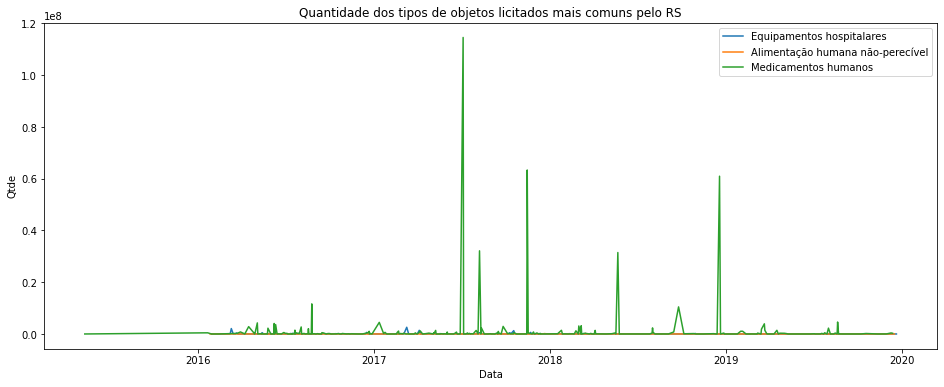

In [78]:
plt.figure(figsize=(16,6))
plt.title("Quantidade dos tipos de objetos licitados mais comuns pelo RS") 
sns.lineplot(data= equip['Equipamentos hospitalares'], label= 'Equipamentos hospitalares')
sns.lineplot(data= alim['Alimentação humana não-perecível'], label= 'Alimentação humana não-perecível')
sns.lineplot(data= med['Medicamentos humanos'], label= 'Medicamentos humanos') 
plt.ylabel("Qtde")
plt.xlabel("Data") #importante notar que existiam algumas entradas para o ano de 2015 no dataset de 2016    

É possível notar que os valores absolutos de números de itens para cada uma dessas categorias são muito discrepantes, desta forma, melhor visualizar e analisar cada categoria em separado.

Text(0.5, 0, 'Data')

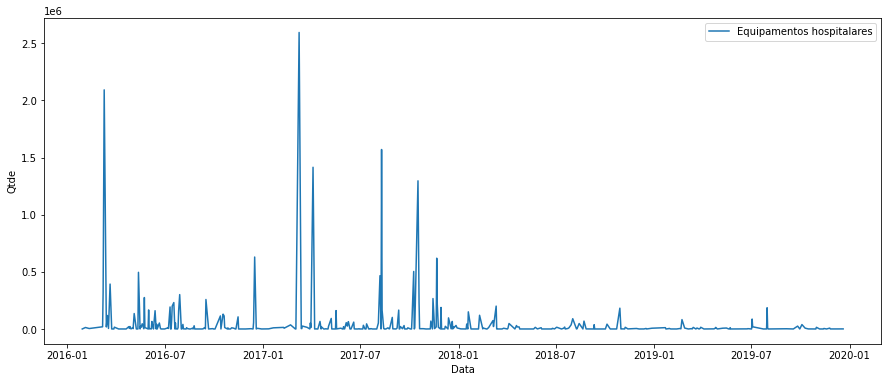

In [70]:
plt.figure(figsize=(15,6))
sns.lineplot(data= equip['Equipamentos hospitalares'], label= 'Equipamentos hospitalares')
plt.ylabel("Qtde")
plt.xlabel("Data")   

Text(0.5, 0, 'Data')

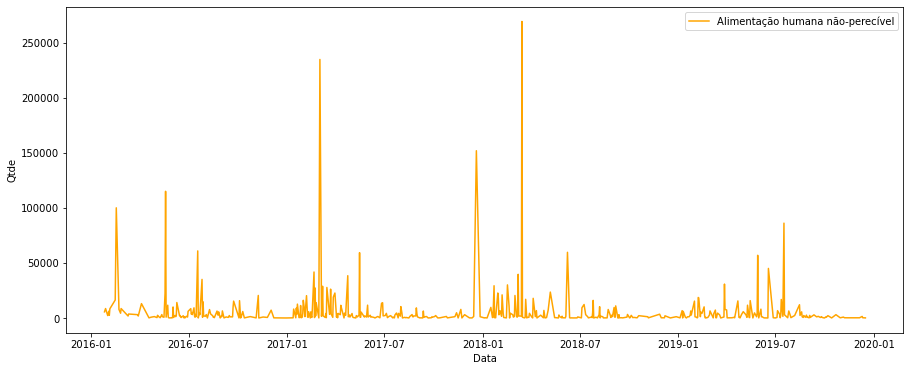

In [75]:
plt.figure(figsize=(15,6))
sns.lineplot(data= alim['Alimentação humana não-perecível'], label= 'Alimentação humana não-perecível', color='orange')
plt.ylabel("Qtde")
plt.xlabel("Data")  

Text(0.5, 0, 'Data')

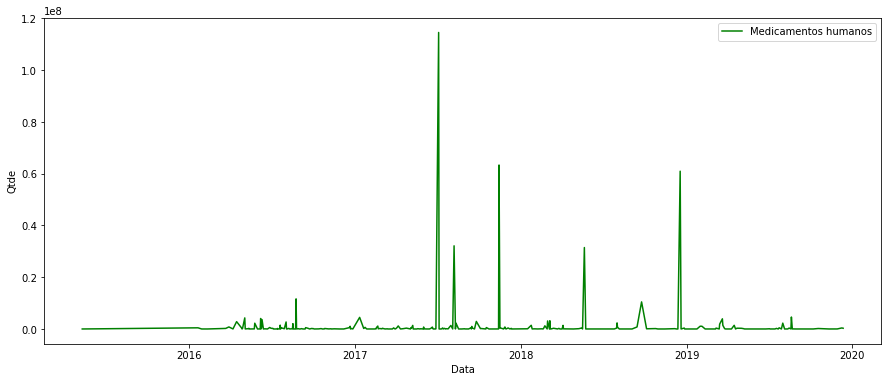

In [77]:
plt.figure(figsize=(15,6))
sns.lineplot(data= med['Medicamentos humanos'], label= 'Medicamentos humanos', color= 'green') 
plt.ylabel("Qtde")
plt.xlabel("Data") #importante notar que existiam algumas entradas para o ano de 2015 no dataset de 2016    

Visualizando separadamente, é possível notar um processo de grande volume de pedidos para os 3 tipos de famílias/itens entre os anos de 2017-2018, e também uma queda notável de pedidos de equipamentos hospitalares a partir do ano de 2018. Para prognósticos mais conclusivos, seria interessante futuramente a análise dessas séries em conjunto com dados como regime de pedidos de licitação por família (e.g. em estados que o ano fiscal fecha em outubro, muitos órgãos correm com pedidos antes de uma data específica neste mês), número de hospitais, upas e escolas abertas em funcionamento no período, disseminação de doenças/endemias que necessitariam de maior volume de medicamentos para população, investimento público/privado nos setores que mais necessitam destes produtos, etc.